# Convolution Net

## Necessary imports

In [108]:
import keras
from keras import backend as K
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
from keras.utils.vis_utils import plot_model
from keras.preprocessing import image
from keras.applications.xception import preprocess_input, decode_predictions

## Grab Image Function

No image flattening like in single layer net

In [3]:
def grab_image(img_path_base, index, numImages):
    #Desired image dimension (image will be square i.e. # by # pixels)
    imageDim = 100
    
    if (index<10):
        img_path = img_path_base+"000"+str(index)+"_model.png"
    elif (index<100 and index >=10):
        img_path = img_path_base+"00"+str(index)+"_model.png"
    elif (index<1000 and index>=100):
        img_path = img_path_base+"0"+str(index)+"_model.png"
    elif (index<10000 and index>=1000):
        img_path = img_path_base+str(index)+"_model.png"
        
    img = image.load_img(img_path, target_size=(imageDim, imageDim), color_mode = "grayscale")
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

#Num of images to read in
numImages = 600
X = np.concatenate([grab_image('/home/atm4w/Project/Data/miscImgs/',i, numImages) for i in range(numImages)]) 
X /= 255.0

X.shape

(600, 100, 100, 1)

## Check an image to make sure it was read in right

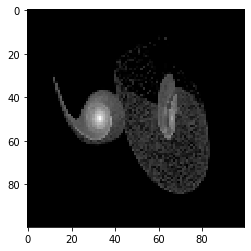

In [4]:
plt.imshow(image.array_to_img(X[45,:,:,:]), cmap='Greys_r')
plt.show()

## Load in model scores

In [104]:
Y = np.loadtxt('/home/atm4w/Project/Data/miscImgs/scores/humanScores.txt')
Y=Y[0:600]
display(Y[0:10])
display(Y.shape)

array([0.945946, 0.941176, 0.918919, 0.916667, 0.916667, 0.914286,
       0.914286, 0.911765, 0.891892, 0.885714])

(600,)

## Shuffle model images and scores

In [6]:
p = np.random.permutation(len(X))
Xshuffled = X[p]
Yshuffled = Y[p]

display(Xshuffled.shape)
display(Yshuffled.shape)

(600, 100, 100, 1)

(600,)

## Show image and score to verify that they were shuffled with link between model and corresponding score intact

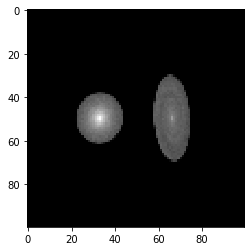

0.138889

In [7]:
plt.imshow(image.array_to_img(Xshuffled[0,:,:,:]), cmap='Greys_r')
plt.show()
display(Yshuffled[0])

## Split into training and test data (85% for training and validation)

In [8]:
x_train = Xshuffled[0:(round(numImages*.85)),:,:]
y_train = Yshuffled[0:(round(numImages*.85))]
x_test = Xshuffled[(round(numImages*.85)): , : , :]
y_test = Yshuffled[(round(numImages*.85)):]

display(x_train.shape)
display(y_train.shape)
display(x_test.shape)
display(y_test.shape)

(510, 100, 100, 1)

(510,)

(90, 100, 100, 1)

(90,)

## Build net and generate image of architecture

In [63]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(16, kernel_size=(12, 12),
                activation='relu',
                input_shape=[x_test.shape[1],
                x_test.shape[2],
                x_test.shape[3]]))
model.add(keras.layers.Conv2D(32, kernel_size=(8, 8), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(keras.layers.Dropout(.5))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1, activation='sigmoid'))


model.compile(loss=keras.losses.mean_squared_error, optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=['mse'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 89, 89, 16)        2320      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 82, 82, 32)        32800     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 41, 41, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 41, 41, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 53792)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                1721376   
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)               

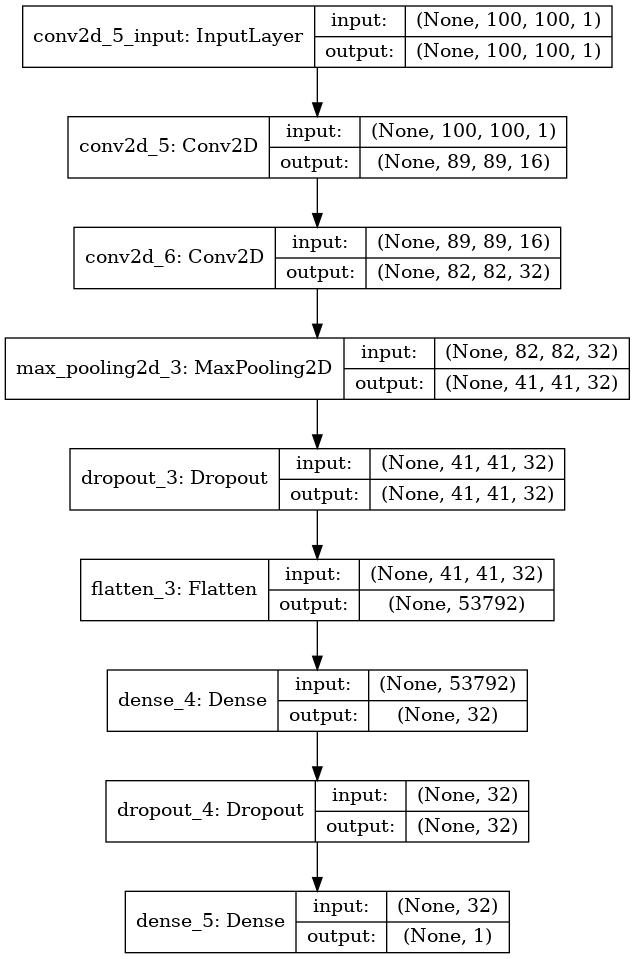

In [106]:
plot_model(model,to_file='convNet.png',show_shapes=True,expand_nested=True)

## Train it

In [64]:
batch_size = 4
epochs = 120
history = model.fit(x_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    verbose=1,
    validation_split = 0.3)

Train on 357 samples, validate on 153 samples
Epoch 1/120
357/357 [==============================] - 15s 42ms/step - loss: 0.0575 - mse: 0.0575 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 2/120
357/357 [==============================] - 14s 40ms/step - loss: 0.0502 - mse: 0.0502 - val_loss: 0.0577 - val_mse: 0.0577
Epoch 3/120
357/357 [==============================] - 14s 40ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0555 - val_mse: 0.0555
Epoch 4/120
357/357 [==============================] - 14s 40ms/step - loss: 0.0496 - mse: 0.0496 - val_loss: 0.0586 - val_mse: 0.0586
Epoch 5/120
357/357 [==============================] - 15s 41ms/step - loss: 0.0491 - mse: 0.0491 - val_loss: 0.0571 - val_mse: 0.0571
Epoch 6/120
357/357 [==============================] - 15s 41ms/step - loss: 0.0482 - mse: 0.0482 - val_loss: 0.0557 - val_mse: 0.0557
Epoch 7/120
357/357 [==============================] - 14s 41ms/step - loss: 0.0475 - mse: 0.0475 - val_loss: 0.0556 - val_mse: 0.0556
Epoch 8/1

## Generate loss (MSE) plot

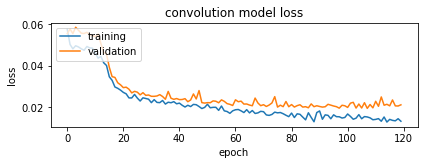

In [95]:
plt.figure()
plt.subplot(212)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('convolution model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.tight_layout()
plt.savefig("ConvModelLoss.png")
plt.show()

## Test on remaining 90 images and calculate mean difference between predicted and actual scores

In [66]:
preds = model.predict(x_test)
diff = preds.flatten() - (y_test)
print("Mean difference")
print("---------------")
display(np.mean(np.abs(diff)))

Mean difference
---------------


0.11193679935781162

## Save model

In [67]:
model.save("atm4wCurModel")

## Various data plots

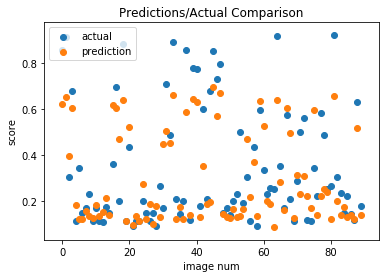

<Figure size 14400x1440 with 0 Axes>

In [68]:
shuffledInd = np.linspace(0,89,num = 90)

plt.figure()
plt.scatter(shuffledInd, y_test)
plt.scatter(shuffledInd, preds)
plt.title("Predictions/Actual Comparison")
plt.ylabel("score")
plt.xlabel("image num")
plt.legend(['actual', 'prediction'], loc='upper left')
plt.figure(figsize=(200,20))
plt.show()

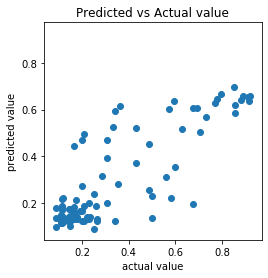

In [93]:
plt.figure()
plt.scatter(y_test, preds)
plt.title("Predicted vs Actual value")
plt.ylabel("predicted value")
plt.xlabel("actual value")
plt.savefig("ConvPredictedVAct.png")
plt.axis('square')
plt.show()

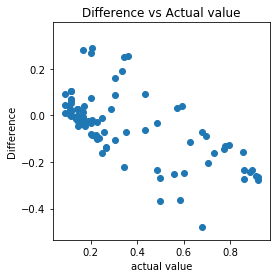

In [94]:
plt.figure()
plt.scatter(y_test, diff)
plt.title("Difference vs Actual value")
plt.ylabel("Difference")
plt.xlabel("actual value")
plt.axis('square')
plt.savefig("ConvDiffVAct.png")
plt.show()

## Find the 10 worst and 5 best predictions

In [113]:
absDiff = np.abs(diff)

top10 = np.argpartition(absDiff, -10)[-10:]
bottom5= np.argpartition(absDiff, 5)[:5]
display(top10)
display(bottom5)

array([81, 53, 64, 68, 37, 30, 77, 17, 71, 44])

array([87, 19, 23, 48, 86])

## Show the 10 worst predictions

In [71]:
for i in range (10):
    print("Human Score")
    display(y_test[top10[i]])
    print("Prediction")
    display(preds[top10[i]][0])
    print("---------------")

array([81, 53, 64, 68, 37, 30, 77, 17, 71, 44])

array([87, 19, 23, 48, 86])

Human Score


0.918919

Prediction


0.6564193

---------------
Human Score


0.5

Prediction


0.13430513

---------------
Human Score


0.916667

Prediction


0.63838536

---------------
Human Score


0.205882

Prediction


0.49685866

---------------
Human Score


0.857143

Prediction


0.58444816

---------------
Human Score


0.166667

Prediction


0.4456018

---------------
Human Score


0.583333

Prediction


0.21941198

---------------
Human Score


0.2

Prediction


0.4688892

---------------
Human Score


0.5

Prediction


0.2307687

---------------
Human Score


0.676471

Prediction


0.19598126

---------------


## Show the 10 models that had the largest difference between predicted and human score

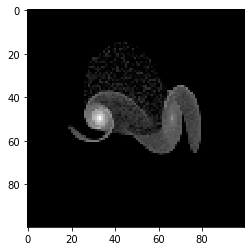

Human Score


0.918919

Prediction


0.6564193

In [72]:
plt.imshow(image.array_to_img(x_test[top10[0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[0]])
print("Prediction")
display(preds[top10[0]][0])

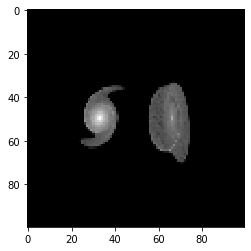

Human Score


0.5

Prediction


0.13430513

In [73]:
plt.imshow(image.array_to_img(x_test[top10[1],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[1]])
print("Prediction")
display(preds[top10[1]][0])

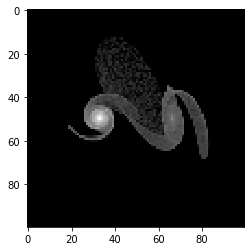

Human Score


0.916667

Prediction


0.63838536

In [91]:
plt.imshow(image.array_to_img(x_test[top10[2],:,:,:]), cmap='Greys_r') 
plt.savefig("ConvHumanNoiseExample2.png")
plt.show()

print("Human Score")
display(y_test[top10[2]])
print("Prediction")
display(preds[top10[2]][0])

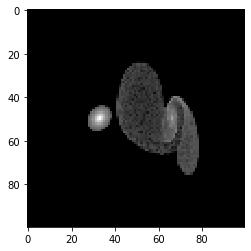

Human Score


0.205882

Prediction


0.49685866

In [75]:
plt.imshow(image.array_to_img(x_test[top10[3],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[3]])
print("Prediction")
display(preds[top10[3]][0])

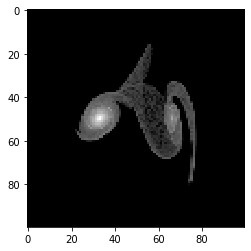

Human Score


0.857143

Prediction


0.58444816

In [76]:
plt.imshow(image.array_to_img(x_test[top10[4],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[4]])
print("Prediction")
display(preds[top10[4]][0])

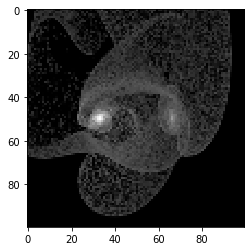

Human Score


0.166667

Prediction


0.4456018

In [77]:
plt.imshow(image.array_to_img(x_test[top10[5],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[5]])
print("Prediction")
display(preds[top10[5]][0])

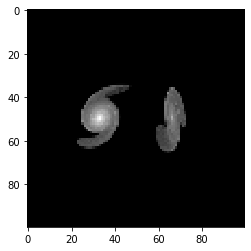

Human Score


0.583333

Prediction


0.21941198

In [78]:
plt.imshow(image.array_to_img(x_test[top10[6],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[6]])
print("Prediction")
display(preds[top10[6]][0])

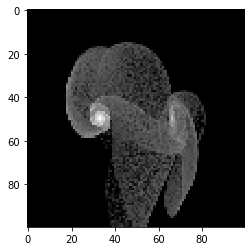

Human Score


0.2

Prediction


0.4688892

In [79]:
plt.imshow(image.array_to_img(x_test[top10[7],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[7]])
print("Prediction")
display(preds[top10[7]][0])

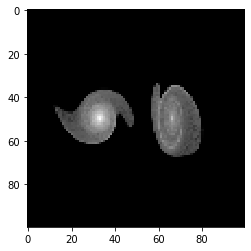

Human Score


0.5

Prediction


0.2307687

In [80]:
plt.imshow(image.array_to_img(x_test[top10[8],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[top10[8]])
print("Prediction")
display(preds[top10[8]][0])

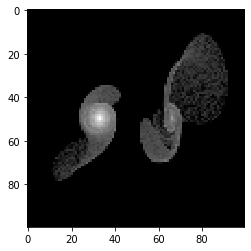

Human Score


0.676471

Prediction


0.19598126

In [90]:
plt.imshow(image.array_to_img(x_test[top10[9],:,:,:]), cmap='Greys_r') 
plt.savefig("ConvHumanNoiseExample.png")
plt.show()

print("Human Score")
display(y_test[top10[9]])
print("Prediction")
display(preds[top10[9]][0])

## Show the 5 models that the net had the closest prediction on

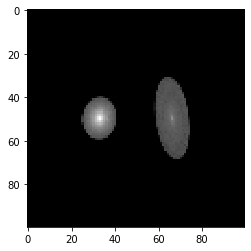

Human Score


0.117647

Prediction


0.11905779

In [82]:
plt.imshow(image.array_to_img(x_test[bottom5[0],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[0]])
print("Prediction")
display(preds[bottom5[0]][0])

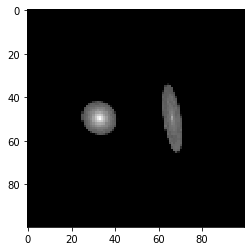

Human Score


0.111111

Prediction


0.113982975

In [83]:
plt.imshow(image.array_to_img(x_test[bottom5[1],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[1]])
print("Prediction")
display(preds[bottom5[1]][0])

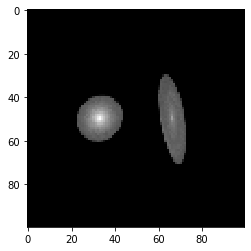

Human Score


0.114286

Prediction


0.111330904

In [84]:
plt.imshow(image.array_to_img(x_test[bottom5[2],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[2]])
print("Prediction")
display(preds[bottom5[2]][0])

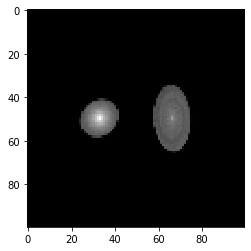

Human Score


0.147059

Prediction


0.14300595

In [85]:
plt.imshow(image.array_to_img(x_test[bottom5[3],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[3]])
print("Prediction")
display(preds[bottom5[3]][0])

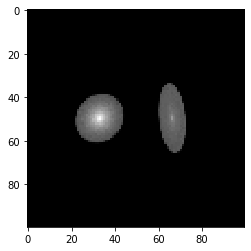

Human Score


0.142857

Prediction


0.14036493

In [86]:
plt.imshow(image.array_to_img(x_test[bottom5[4],:,:,:]), cmap='Greys_r') 
plt.show()

print("Human Score")
display(y_test[bottom5[4]])
print("Prediction")
display(preds[bottom5[4]][0])

In [87]:
maxPred = np.amax(preds, axis=0)
maxPredIndex = np.where(preds == maxPred)
display(maxPred[0])
display(maxPredIndex[0][0])

0.6952314

45

## Show the model that the net gave the highest score

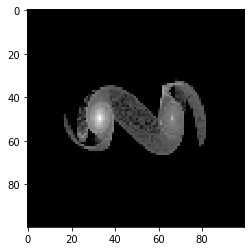

Human Score


0.852941

Prediction


0.6952314

In [89]:
plt.imshow(image.array_to_img(x_test[maxPredIndex[0][0],:,:,:]), cmap='Greys_r') 
plt.savefig("ConvPredictedBest.png")
plt.show()

print("Human Score")
display(y_test[maxPredIndex[0][0]])
print("Prediction")
display(preds[maxPredIndex[0][0]][0])

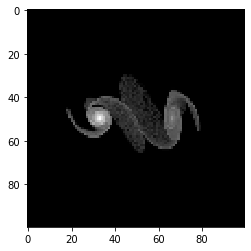

In [114]:
plt.imshow(image.array_to_img(x_test[0,:,:,:]), cmap='Greys_r') 

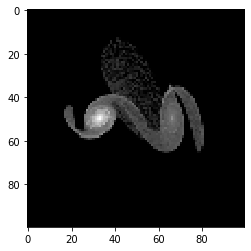

In [116]:
plt.imshow(image.array_to_img(x_test[1,:,:,:]), cmap='Greys_r')

In [117]:
# Get the layer outputs for the -first- image...
layer_outputs = functor([x_train[0:1,:,:,:],1])
len(layer_outputs)

NameError: name 'functor' is not defined